In [1]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}
!mkdir -p drive
!google-drive-ocamlfuse drive

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [2]:
!ls

datalab  drive


In [4]:
!ls drive

araguler.jpg	 KapsulAglari.ipynb  Python Numpy Giriş  VeriArtirma
Colab Notebooks  Python_Giris.ipynb  titanic		 Veri_Artirma


In [0]:
import os
os.chdir("drive/Veri_Artirma")

In [6]:
!ls

araguler.jpg   logo.jpg		    veri_artirma_nasil_yapilir.ipynb
ChetBaker.jpg  veriartirma_1.ipynb  veri_artirma_tekli.ipynb


### CIFAR 10 veri kümesi ile veri artırma örnekleri ve görselleştirme

In [0]:
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from keras import backend as K
import numpy as np


In [25]:
# Veriyi indirme ve eğitim test kümelerini rastgele oluşturma

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/=255
X_test/=255

170508288/170498071 [==============================] - 41s 0us/step


# Orijinal Görüntüler

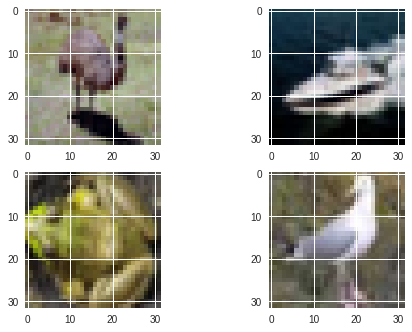

In [28]:
datagen = ImageDataGenerator()
datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=4, seed=499):
  for i in range(0,4):
    pyplot.subplot(220 +1 +i)
    pyplot.imshow(X_batch[i])
  pyplot.show()
  break

# DÖNDÜRME

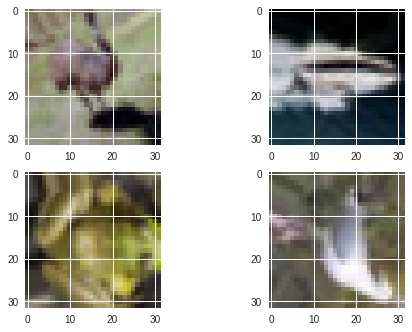

In [29]:
datagen = ImageDataGenerator(rotation_range=359)
datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=4, seed=499):
  for i in range(0,4):
    pyplot.subplot(220 +1 +i)
    pyplot.imshow(X_batch[i])
  pyplot.show()
  break

# DİKEYDE KAYDIRMA

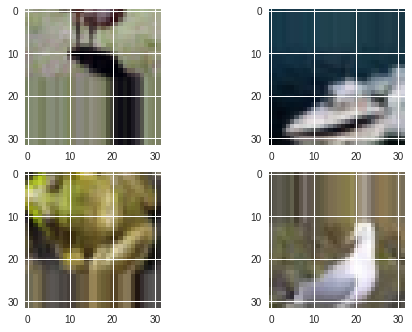

In [30]:
datagen = ImageDataGenerator(height_shift_range=0.5)
datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=4, seed=499):
  for i in range(0,4):
    pyplot.subplot(220 +1 +i)
    pyplot.imshow(X_batch[i])
  pyplot.show()
  break

# YATAYDA SİMETRİĞİNİ ALMA

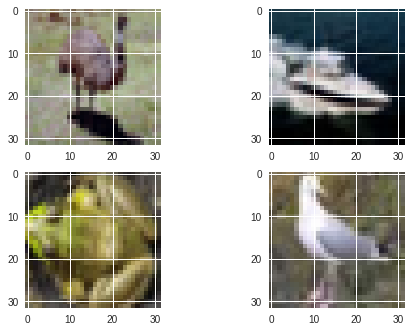

In [31]:
datagen = ImageDataGenerator(horizontal_flip=True)
datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=4, seed=499):
  for i in range(0,4):
    pyplot.subplot(220 +1 +i)
    pyplot.imshow(X_batch[i])
  pyplot.show()
  break